# ML for Regression

In [10]:
import numpy as np
import pandas as pd

# Data  Preparation

In [11]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [12]:
!curl $data > data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1440k  100 1440k    0     0  1204k      0  0:00:01  0:00:01 --:--:-- 1204k


In [13]:
df = pd.read_csv('data.csv')

In [14]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [15]:
df.head(n=5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [16]:
df['make'].str.lower().str.replace(' ','_')

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [17]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [18]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')
    

In [19]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploratory data analysis

In [20]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()


make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

```
Distribution of price
```

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

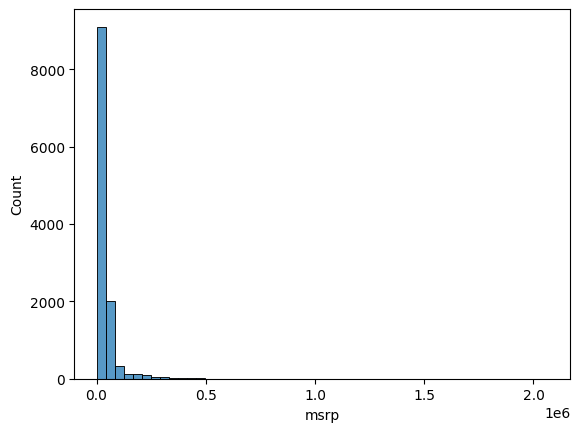

In [22]:
sns.histplot(df.msrp,bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

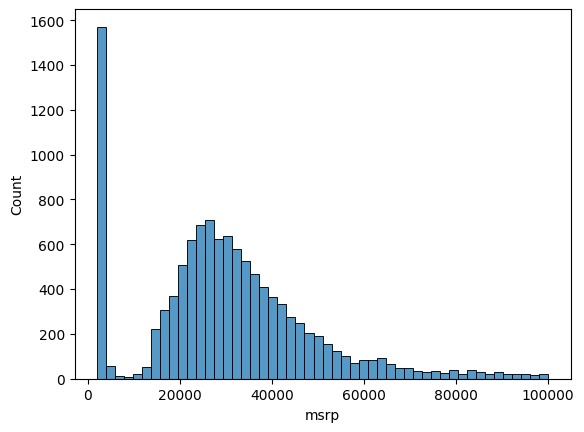

In [23]:
sns.histplot(df.msrp[df.msrp < 100000],bins=50)

In [24]:
# this is log(1+x) to tranform some values 
np.log1p([0,1,10,1000,100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [25]:
# use log1p to transform the the msrps , to reduce the scale, and it is reduced drastically
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

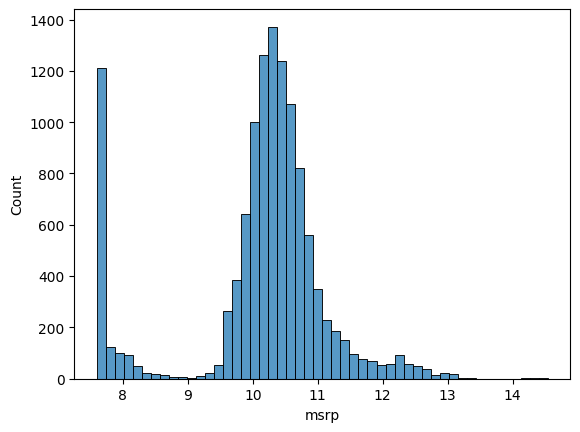

In [26]:
sns.histplot(price_logs,bins=50)

##### missing values

In [27]:
# look for missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# setting up validation framework

In [28]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val- n_test

In [29]:
n, n_val, n_test, n_train

(11914, 2382, 2382, 7150)

In [30]:
df.iloc[:5]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [31]:
# distribute the data into three parts , but these are not random
df_train = df.iloc[n_train:]
df_val = df.iloc[n_val:n_val+n_train]
df_test = df.iloc[n_val+n_test:]

In [32]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913], shape=(11914,))

In [33]:
# now we shuffle the indexes to get random datapoints in each dataset , to reduce bias 
np.random.seed(2)
np.random.shuffle(idx)

In [34]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_val+n_train]]
df_test = df.iloc[idx[n_val+n_train:]]

In [35]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [36]:
len(df_train),len(df_val), len(df_test)

(7150, 2382, 2382)

In [37]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [38]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [39]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# Linear Regresiion

In [40]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [41]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [42]:
def linear_regression(xi):
    n = len(xi)
    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred    
    

In [43]:
linear_regression(xi)

12.312

In [44]:
np.expm1(12.312)

np.float64(222347.2221101062)

# Linear regression vector form

In [45]:
def dot(xi, w):
    n = len(xi)

    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j] 
    return res    

In [46]:
def linear_regression(xi):
    return w0 + dot(xi,w)

In [47]:
w_new = [w0]+ w

In [48]:
w_new 

[7.17, 0.01, 0.04, 0.002]

In [49]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [50]:
linear_regression(xi)

12.312

In [51]:
x1 = [1,148,24,1385]
x2 = [1,132,25,2031]
x3 = [1,453,11,86]
X = [x1, x2, x3]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [52]:
def linear_regression(X):
    return X.dot(w_new)

In [53]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

# Trainning a linear regression model

In [54]:
def train_linear_regression(X,y):
    pass

In [55]:
X = [ 
    [148,24,1385],
    [132,25,2031],
    [453,11,816],
    [188,44,785],
    [192,75,231],
    [373,41,836],
    [291,24,285],
    [282,98,811],
    [285,81,387]]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,  816],
       [ 188,   44,  785],
       [ 192,   75,  231],
       [ 373,   41,  836],
       [ 291,   24,  285],
       [ 282,   98,  811],
       [ 285,   81,  387]])

In [56]:
ones = np.ones(X.shape[0])
X = np.column_stack([ones, X])

In [57]:
y = [ 12, 16, 23, 16, 15, 17, 19, 13, 12]

In [58]:
XTX = X.T.dot(X)

In [59]:
XTX_inv = np.linalg.inv(XTX)

In [60]:
w_full = XTX_inv.dot(X.T).dot(y)

In [61]:
w0 = w_full[0]
w = w_full[1:]
w0, w

(np.float64(16.073271339923775),
 array([ 0.01645453, -0.07663527, -0.0010324 ]))

In [62]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [63]:
X = [ 
    [148,24,1385],
    [132,25,2031],
    [453,11,816],
    [188,44,785],
    [192,75,231],
    [373,41,836],
    [291,24,285],
    [282,98,811],
    [285,81,387]]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,  816],
       [ 188,   44,  785],
       [ 192,   75,  231],
       [ 373,   41,  836],
       [ 291,   24,  285],
       [ 282,   98,  811],
       [ 285,   81,  387]])

In [64]:
train_linear_regression(X,y)

(np.float64(16.073271339923775),
 array([ 0.01645453, -0.07663527, -0.0010324 ]))

# Car price Baseline model

In [65]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [66]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [67]:
X_train = df_train[base].values

In [68]:
X_train = df_train[base].fillna(0).values

In [69]:
w0, w = train_linear_regression(X_train, y_train)

In [70]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

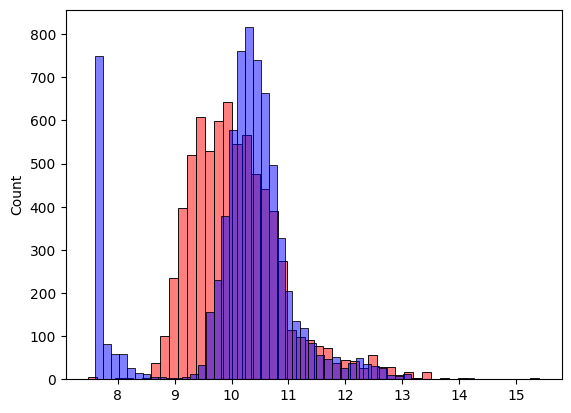

In [71]:
sns.histplot(y_pred,color='red',alpha = 0.5,bins=50)
sns.histplot(y_train,color='blue', alpha = 0.5, bins=50)

# RMSE

rmse = $$
\displaystyle\sqrt{(1/m)*(\sum_{}(g_{xi} - y_{i})^2)}
$$

In [72]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [73]:
rmse(y_train , y_pred)

np.float64(0.7554192603920132)

# validating the model

In [74]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

In [75]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [76]:
X_train = prepare_X(df_train)
w0 ,w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.761653099130156)

# simple feature engineering

In [77]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [78]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [79]:
X_train = prepare_X(df_train)

In [80]:
w0 ,w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5172055461058299)

<Axes: ylabel='Count'>

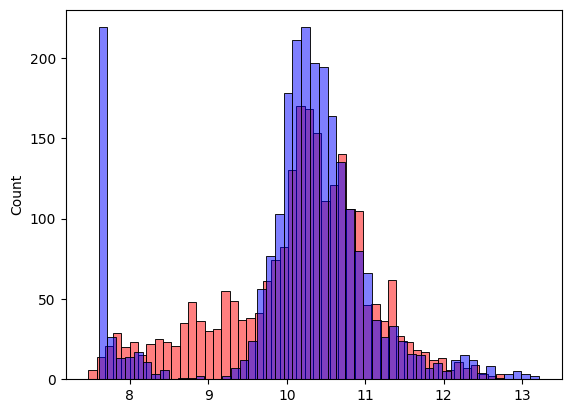

In [81]:
sns.histplot(y_pred,color='red',alpha = 0.5,bins=50)
sns.histplot(y_val,color='blue', alpha = 0.5, bins=50)

# categorical variables

In [82]:
for v in [2,3,4]:
    df_train['num_door_%s' %v] = (df_train.number_of_doors == v).astype('int')

In [83]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df['num_door_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_door_%s' %v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [84]:
X_train = prepare_X(df_train)
w0 ,w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.515799564150169)

In [85]:
makes = list(df.make.value_counts().head().index)

In [86]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df['num_door_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_door_%s' %v)
    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [87]:
X_train = prepare_X(df_train)
w0 ,w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5076038849556795)

In [88]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
num_door_2             int64
num_door_3             int64
num_door_4             int64
dtype: object

In [89]:
categorical_variables = ['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
              'market_category','vehicle_size','vehicle_style']
              

In [90]:
categories = {}
for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [91]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df['num_door_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_door_%s' %v)

    for c,values in categories.items():
        for v in values:
            df['%s_%s' % (c,v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c,v))
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [92]:
X_train = prepare_X(df_train)
w0 ,w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(23.019020704791835)

- got very high weight so rmse is very high

# regularization 

In [93]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.000001], # to avoid singular matrix
]
X = np.array(X)
X

array([[4.      , 4.      , 4.      ],
       [3.      , 5.      , 5.      ],
       [5.      , 1.      , 1.      ],
       [5.      , 4.      , 4.      ],
       [7.      , 5.      , 5.      ],
       [4.      , 5.      , 5.000001]])

In [94]:
y = [1,2,3,1,2,3]

In [95]:
XTX = X.T.dot(X)
XTX

array([[140.      , 111.      , 111.000004],
       [111.      , 108.      , 108.000005],
       [111.000004, 108.000005, 108.00001 ]])

In [96]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv.dot(X.T).dot(y)

array([ 4.14130492e-01, -1.76437236e+06,  1.76437228e+06])

In [97]:
XTX = [
    [1,2,2],
    [2,1,1.0000001],
    [2,1.0000001,1]]
XTX = np.array(XTX)

In [98]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [99]:
XTX = XTX + 0.01 * np.eye(3)

In [100]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [101]:
def train_linear_regression_reg(X,y,r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [102]:
X_train = prepare_X(df_train)
w0 ,w = train_linear_regression_reg(X_train, y_train, r = 0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.45652199012897743)

# tuning the model 

In [103]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0 ,w = train_linear_regression_reg(X_train, y_train, r = r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r,w0, score)

0.0 6.2766071476973995 0.45652199012897743
1e-05 6.2766071476973995 0.45652199012897743
0.0001 6.2766071476973995 0.45652199012897743
0.001 6.2766071476973995 0.45652199012897743
0.01 6.2766071476973995 0.45652199012897743
0.1 6.2766071476973995 0.45652199012897743
1 6.2766071476973995 0.45652199012897743
10 6.2766071476973995 0.45652199012897743


# using the model 

In [104]:
df_full_train = pd.concat([df_train,df_val])

In [105]:
df_full_train = df_full_train.reset_index(drop=True)

In [106]:
X_full_train = prepare_X(df_full_train)

In [107]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]], shape=(9532, 41))

In [108]:
y_full_train = np.concatenate([y_train, y_val])

In [109]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [110]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.4517787580982509)

In [111]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [112]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [117]:
X_small = prepare_X(df_small)

In [119]:
y_pred = w0 + X_small.dot(w)
y_pred

array([10.46257585])

In [126]:
test = np.expm1(y_test[20])

In [127]:
prediction = np.expm1(y_pred)

In [133]:
print('RMSE: ' + str(abs(prediction - test)** 0.5))

RMSE: [4.41103986]
